Here I am using sklearn library to implement all the major algorithms from Regression part of Supervised Learning. Will use Matplotlib to draw the outcomes or model predictions.

Global Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

<h1>1. Simple Linear Regression</h1>

Algorithm specific imports

In [2]:
from sklearn.linear_model import LinearRegression

Extracting training and test dataset 

In [47]:
#dataset = pd.read_csv('../input/salary-data/Salary_Data.csv')
dataset = pd.read_csv("Companies.csv", sep=';', encoding = "ISO-8859-1") # , index_col = 0

cols = dataset.iloc[:,4:].columns
for col in cols:
    dataset[col] = dataset[col].astype(str).str.replace(",", ".").astype(float)

X = dataset.iloc[:,4:52].values
y = dataset.iloc[:,52:].values

# We are going to keep 20% of the dataset in test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

Training model and making prediction

In [60]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
#np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1)
#X_test.reshape(-1, 1)
y_predict = linear_regressor.predict(X_test)

In [72]:
X_train[:,1:4].shape

(733, 3)

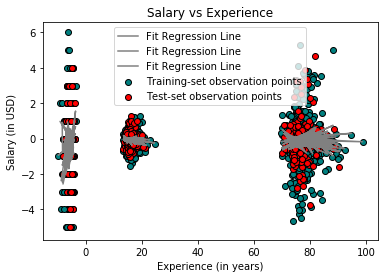

In [76]:
# Plot points and fit line for training data
plt.scatter(X_train[:,1:4], y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train[:,1:4], linear_regressor.predict(X_train), color='grey', label='Fit Regression Line')
plt.title('Salary vs Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test[:,1:4], y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()


<h1>2. Multivarite Linear Regression</h1>

Import libraries

In [78]:
# We already have imported LinearRegression in above algorithm, going to use the same
import statsmodels.formula.api as sm

Extracting training and test dataset

In [ ]:
# #dataset = pd.read_csv('../input/m-50-startups/50_Startups.csv')

# #X = dataset.iloc[:,:-1].values
# #y = dataset.iloc[:,-1].values

# # Handle categorical variable - State column
# labelencoder_X = LabelEncoder()
# X[:,3] = labelencoder_X.fit_transform(X[:, 3])
# hotonencoder_X = OneHotEncoder(categorical_features = [3])
# X = hotonencoder_X.fit_transform(X).toarray()

# # Avoiding the dummy trap
# X = X[:, 1:]

# # We are going to keep 20% of the dataset in test dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

Algorithm execution

In [79]:
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

# y_pred contains all the values predicted by trained model
y_pred = multiple_linear_regressor.predict(X_test)

*  <h2> Backward Elimination for model optimization</h2>

Our current model is not optimal, since we don't know the impact of every predictor (or feature) on target variable. So we are going to use Backward Elimanation technique to make it optimal by removing insignificant predictors.

In [ ]:
# adding const X0 at the very start of matrix
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1)

In [ ]:
# Starting Backword Elimination Steps
# Step 1 - Taking all the predictors(features) in X_opt. Our X_opt will contain only most optimal predictors. We will keep optimizing it
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
# Step 2 - fitting the full model with all predictors
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05 
regressor_OLS.summary()
# Step 4 - removing the predictor [In this case column with index 2]
X_opt = X[:, [0, 1, 3, 4, 5]]
# Step 5 - Re-fit the model with removed predictor
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

### Repeating 3, 4, 5 till we don't get all the predictor with Significant level < 0.5
# Removed 2nd index column and done fitting.

# Step 3 - analysing & fetching the predictor with value more than 0.05 
regressor_OLS.summary()
# Step 4 - removing the predictor [In this case column with index 1]
X_opt = X[:, [0, 3, 4, 5]]
# Step 5 - Re-fit the model with removed predictor
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Removed 1st index column and done fitting.

# Step 3 - analysing & fetching the predictor with value more than 0.05 
regressor_OLS.summary()
# Step 4 - removing the predictor [In this case column with index 4]
X_opt = X[:, [0, 3, 5]]
# Step 5 - Re-fit the model with removed predictor
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Removed 4th index column and done fitting.

# Step 3 - analysing & fetching the predictor with value more than 0.05 
regressor_OLS.summary()
# Step 4 - removing the predictor [In this case column with index 5]
X_opt = X[:, [0, 3]]
# Step 5 - Re-fit the model with removed predictor
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Removed 5th index column and done fitting.
regressor_OLS.summary()

# FINISHED

Now all predictors are below 0.05 significant level and our model is optimized as per Backward Elimination

<h1>3. Polynomial Regression</h1>

Import algorithm specific modules

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
dataset = pd.read_csv('../input/polynomial-position-salary-data/Position_Salaries.csv')

X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

# We don't have enough record in our dataset, so we are going to skip the step of spliting our X, y into test and train dataset

From here. we are simply generating the matrix for X^0, X^1 and X^2

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y)

# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

We have trained both models linear and polynomial. Now we are going to compare the plots of both models


In [ ]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, linear_reg_model.predict(X), label='Linear regressor fit curve')
plt.plot(X, poly_reg_model.predict(poly_reg.fit_transform(X)), label='Polynmial regressor fit line')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

<h1>4. Simple Vector Regression (SVR)</h1>

Import model specific libraries

In [ ]:
from sklearn.svm import SVR

In [ ]:
dataset = pd.read_csv('../input/polynomial-position-salary-data/Position_Salaries.csv')

X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

Performing feature scaling, since it is not an inbuild feature of SVR class in sk-learn

In [ ]:
scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y.reshape(-1, 1))

Algorithm execution

In [ ]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X, y)

Visualizing the SVR predictions

In [ ]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, svr_regressor.predict(X), label='SVR regressor')
plt.title('Truth or bluff (SVR Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

Predicting salary for someone who has 6.5 years of experience.

In [ ]:
scale_y.inverse_transform(svr_regressor.predict(scale_X.transform(np.array([[6.5]]))))

<h1>5. Decision Tree - Regression</h1>

Algorithm specific imports

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Read dataset and extract feature and target variable from that.

In [ ]:
dataset = pd.read_csv('../input/polynomial-position-salary-data/Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

No need to perform feature scaling. Since it will get taken care by the library itself.

Creating regressor

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)

Visualizing the graph

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, tree_regressor.predict(X_grid), label='Tree regressor')
plt.title('Truth or bluff (Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

Predicting salary for someone who has 6.5 years of experience.

In [ ]:
tree_regressor.predict([[6.5]])

Here we are not getting the good prediction, may be because of 2D plain (or single feature). It should give better predictions for 3d plan.

<h1>6. Random Forest Regression</h1>

Algorithm specific imports

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset = pd.read_csv('../input/polynomial-position-salary-data/Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

Regressor creation

In [ ]:
forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest_regressor.fit(X, y)

Plot and visualize graph

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), label='Random Forest regressor')
plt.title('Truth or bluff (Random Forest Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

Predict salary for 6.5 year experienced employee, we are taking same value of x so that we can compare the predicted value form Polynomial's and Decision Tree's prediction

In [ ]:
forest_regressor.predict([[6.5]])

This prediction is much better than the ones obtained from other regression algorithms

In [ ]:
Will keep refining these implementations and visualizations.